In [1]:
#quandl - python package used to Get financial data directly into Python

In [2]:
import pandas as pd
import quandl
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import math 
import datetime

In [3]:
#data
df = quandl.get("WIKI/GOOGL")


In [4]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [5]:

 df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [6]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

In [7]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [8]:
df.columns

Index(['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',
       'HL_PCT', 'PCT_change'],
      dtype='object')

In [9]:
#Final df useful data
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [10]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0


In [11]:
df.columns  

Index(['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume'], dtype='object')

In [12]:
#Additional features to the data include: forecat col
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)

#forecast out 
forecast_out = int(math.ceil(0.01*len(df)))


In [13]:
#Add a label as the already existing columns will be considered to be the features
df['label'] = df[forecast_col].shift(-forecast_out)

In [14]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,1.964351,0.130884,1990515.0,NaN
2018-03-22,1053.15,3.254997,-2.487014,3418154.0,NaN
2018-03-23,1026.55,4.082607,-2.360729,2413517.0,NaN
2018-03-26,1054.09,4.619150,0.332191,3272409.0,NaN
2018-03-27,1006.94,6.645878,-5.353887,2940957.0,NaN


In [15]:
#drop nans
final_df = df
#latest_df = df[-forecast_out:]

In [20]:
#Split the data into Features(X) and labels(y)

X = np.array(final_df.drop('label',axis='columns'))
y = np.array(final_df['label'][:-forecast_out])
y_latest = np.array(final_df['label'][-forecast_out:])

In [21]:
X.shape, y.shape

((3424, 4), (3389,))

In [22]:
#Generally, you want your features in machine learning to be in a range of -1 to 1.

X = preprocessing.scale(X)
X = X[:-forecast_out]
X_latest = X[-forecast_out:]


In [23]:
# The next step involves classifying the data into training and testing samples using sklearns train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
ref_model = LinearRegression

In [25]:
# Our regression models are svm's and LinearRegression
LNM = LinearRegression()
SVM = svm.SVR(kernel='linear')

In [26]:
LNM.fit(X_train, y_train)
SVM.fit(X_train, y_train)

SVR(kernel='linear')

In [27]:
confidence_LNM = LNM.score(X_test, y_test)
confidence_SVM = SVM.score(X_test, y_test)

In [28]:
confidence_LNM, confidence_SVM

(0.9786074232836416, 0.9764790528306598)

In [29]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.9764790528306598
poly 0.6273025109839925
rbf 0.7531205487972996
sigmoid 0.8969438428508961


PRREDICTION USING THE MODELS

In [33]:
p_svm = SVM.predict(X_latest)
p_ln = LNM.predict(X_latest)

In [34]:
p_svm

array([1045.22699269, 1057.83732778, 1071.85830337, 1066.82792393,
       1060.69816479, 1058.28379647, 1056.68207038, 1053.77400551,
       1048.2182597 , 1044.18956062, 1041.57068777, 1060.51676957,
       1078.07959761, 1082.16582081, 1096.00409368, 1100.0366482 ,
       1098.45101418, 1096.23481614, 1097.81093624, 1115.34461303,
       1115.29856698, 1123.79403576, 1120.76705335, 1127.94890937,
       1147.95741285, 1158.94742027, 1154.20308845, 1165.05644317,
       1169.76619144, 1169.08817178, 1160.11075613, 1164.89942698,
       1163.34424324, 1100.62666635, 1054.14949511])

In [35]:
p_ln

array([1076.01828789, 1089.88404328, 1103.54265206, 1098.74633368,
       1092.47861484, 1090.22206798, 1088.76713378, 1085.08550567,
       1079.42607662, 1074.98848632, 1072.96086995, 1090.67717212,
       1109.22675898, 1115.13535228, 1129.42273922, 1133.80123201,
       1132.29299254, 1129.77773717, 1131.58898   , 1148.50691709,
       1149.04144859, 1158.16739593, 1155.0536549 , 1163.00124249,
       1182.3311267 , 1195.79773485, 1190.27664093, 1201.83017174,
       1206.50244843, 1206.1158227 , 1196.87678649, 1201.75585248,
       1200.28172296, 1136.23037351, 1082.29549875])

In [50]:
for i in range(len(p_ln)):
    print("SVM - ",int(p_svm[i])," ",'LR - ',int(p_ln[i]))

SVM -  1045   LR -  1076
SVM -  1057   LR -  1089
SVM -  1071   LR -  1103
SVM -  1066   LR -  1098
SVM -  1060   LR -  1092
SVM -  1058   LR -  1090
SVM -  1056   LR -  1088
SVM -  1053   LR -  1085
SVM -  1048   LR -  1079
SVM -  1044   LR -  1074
SVM -  1041   LR -  1072
SVM -  1060   LR -  1090
SVM -  1078   LR -  1109
SVM -  1082   LR -  1115
SVM -  1096   LR -  1129
SVM -  1100   LR -  1133
SVM -  1098   LR -  1132
SVM -  1096   LR -  1129
SVM -  1097   LR -  1131
SVM -  1115   LR -  1148
SVM -  1115   LR -  1149
SVM -  1123   LR -  1158
SVM -  1120   LR -  1155
SVM -  1127   LR -  1163
SVM -  1147   LR -  1182
SVM -  1158   LR -  1195
SVM -  1154   LR -  1190
SVM -  1165   LR -  1201
SVM -  1169   LR -  1206
SVM -  1169   LR -  1206
SVM -  1160   LR -  1196
SVM -  1164   LR -  1201
SVM -  1163   LR -  1200
SVM -  1100   LR -  1136
SVM -  1054   LR -  1082


In [51]:
df.iloc[-1]

Adj. Close     1.006940e+03
HL_PCT         6.645878e+00
PCT_change    -5.353887e+00
Adj. Volume    2.940957e+06
label                   NaN
Name: 2018-03-27 00:00:00, dtype: float64

AttributeError: 'numpy.float64' object has no attribute 'plot'

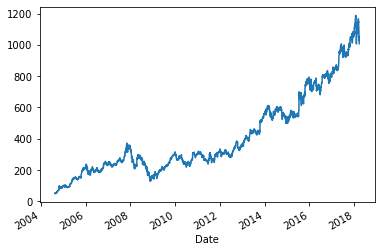

In [49]:
df['Adj. Close'].plot()
confidence_LNM.plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

